In [214]:
import platform as pf
print(pf.python_version())

3.8.5


# Data Mining Final Project

In [215]:
# all import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [216]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40,30
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import Day
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [217]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [218]:
# buyer_basic_info.txt:
buyer_basic_info_df = pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\buyer_basic_info.txt', delim_whitespace=True, 
                 names=("buyer_id", "registration_time", "seller_level", "buyer_level", "age", "gender"))

buyer_basic_info_df.head()

,buyer_id,registration_time,seller_level,buyer_level,age,gender
0,1,1554,-1,7,-1,-1
1,2,1552,0,7,26,2
2,3,1551,2,8,31,2
3,4,1550,-1,4,29,2
4,5,1549,-1,8,37,2


In [219]:
# buyer_historical_category15_quantity.txt:
buyer_historical_category15_quantity_df=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\buyer_historical_category15_quantity.txt', 
delim_whitespace=True, names=("buyer_id", "consumption quantity in the 1st category", "consumption quantity in the 2nd category", 
"consumption quantity in the 3rd category", "consumption quantity in the 4th category", "consumption quantity in the 5th category",
"consumption quantity in the 6th category", "consumption quantity in the 7th category", "consumption quantity in the 8th category",                              
"consumption quantity in the 9th category", "consumption quantity in the 10th category", "consumption quantity in the 11th category",                                  
"consumption quantity in the 12th category", "consumption quantity in the 13th category", "consumption quantity in the 14th category",                                
"consumption quantity in the 15th category"))
buyer_historical_category15_quantity_df.head()

,buyer_id,consumption quantity in the 1st category,consumption quantity in the 2nd category,consumption quantity in the 3rd category,consumption quantity in the 4th category,consumption quantity in the 5th category,consumption quantity in the 6th category,consumption quantity in the 7th category,consumption quantity in the 8th category,consumption quantity in the 9th category,consumption quantity in the 10th category,consumption quantity in the 11th category,consumption quantity in the 12th category,consumption quantity in the 13th category,consumption quantity in the 14th category,consumption quantity in the 15th category
0,1,310,0,0,0,7,0,0,0,5,0,0,0,0,0,0
1,2,16,33,41,0,0,14,4,2,11,3,0,0,0,0,1
2,3,33,0,38,0,12,95,249,77,235,76,13,6,23,67,0
3,4,1,0,0,0,0,0,4,0,1,0,0,0,0,2,0
4,5,8,1,403,0,0,7,18,3,15,1,0,0,0,1,0


In [220]:
# buyer_historical_category15_money.txt:
buyer_historical_category15_money_df=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\buyer_historical_category15_money.txt', 
delim_whitespace=True, names=("buyer_id", "consumption amount in the 1st category", "consumption amount in the 2nd category", 
"consumption amount in the 3rd category", "consumption amount in the 4th category", "consumption amount in the 5th category",
"consumption amount in the 6th category", "consumption amount in the 7th category", "consumption amount in the 8th category",                              
"consumption amount in the 9th category", "consumption amount in the 10th category", "consumption amount in the 11th category",                                  
"consumption amount in the 12th category", "consumption amount in the 13th category", "consumption amount in the 14th category",                                
"consumption amount in the 15th category"))
buyer_historical_category15_money_df.head()

,buyer_id,consumption amount in the 1st category,consumption amount in the 2nd category,consumption amount in the 3rd category,consumption amount in the 4th category,consumption amount in the 5th category,consumption amount in the 6th category,consumption amount in the 7th category,consumption amount in the 8th category,consumption amount in the 9th category,consumption amount in the 10th category,consumption amount in the 11th category,consumption amount in the 12th category,consumption amount in the 13th category,consumption amount in the 14th category,consumption amount in the 15th category
0,1,9882.56,0.0,0.00,0.0,193.00,0.00,0.00,0.00,262.00,0.00,0.00,0.00,0.00,0.00,0.0
1,2,803.70,386.0,864.71,0.0,0.00,1000.72,318.00,197.00,813.26,292.50,0.00,0.00,0.00,0.00,86.0
2,3,1358.93,0.0,1105.92,0.0,1172.36,7040.22,19619.27,5429.14,11919.19,5489.23,5657.55,43.95,511.26,2699.70,0.0
3,4,28.32,0.0,0.00,0.0,0.00,0.00,267.42,0.00,71.00,0.00,0.00,0.00,0.00,34.41,0.0
4,5,772.00,150.0,4291.58,0.0,0.00,514.71,1411.58,416.00,911.40,100.00,0.00,0.00,0.00,35.26,0.0


In [221]:
# product_features.txt:
product_features_df=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\product_features.txt', delim_whitespace=True, 
                                names=("product_id", "attribute_1", "attribute_2", "original price"))
product_features_df.tail()

,product_id,attribute_1,attribute_2,original price
995,721,0,0,98.0
996,832,0,0,15.0
997,860,0,0,18.0
998,452,0,0,13.9
999,607,0,0,20.0


In [222]:
# Key_product_IDs:
Key_product_IDs_df=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\key_product_IDs.txt', delim_whitespace=True,
                              names=["key_product_IDs"])
Key_product_IDs_df.head()

,key_product_IDs
0,1
1,4
2,5
3,6
4,10


In [223]:
# trade_info_training.txt:
trade_info_training_df=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\trade_info_training.txt', delim_whitespace=True,
                              names=["product_id", "buyer_id", "trade_time", "trade_quantity", "trade_price"])
trade_info_training_df.head()

,product_id,buyer_id,trade_time,trade_quantity,trade_price
0,73,3,34,1,29.0
1,73,3,34,1,29.0
2,73,3,34,1,29.0
3,237,6,57,1,198.0
4,650,8,66,1,39.0


In [224]:
#genarating column names
for i in range(0,118):
    print("'", end='')
    print("quantities {}-th day".format(i), end="', ")

'quantities 0-th day', 'quantities 1-th day', 'quantities 2-th day', 'quantities 3-th day', 'quantities 4-th day', 'quantities 5-th day', 'quantities 6-th day', 'quantities 7-th day', 'quantities 8-th day', 'quantities 9-th day', 'quantities 10-th day', 'quantities 11-th day', 'quantities 12-th day', 'quantities 13-th day', 'quantities 14-th day', 'quantities 15-th day', 'quantities 16-th day', 'quantities 17-th day', 'quantities 18-th day', 'quantities 19-th day', 'quantities 20-th day', 'quantities 21-th day', 'quantities 22-th day', 'quantities 23-th day', 'quantities 24-th day', 'quantities 25-th day', 'quantities 26-th day', 'quantities 27-th day', 'quantities 28-th day', 'quantities 29-th day', 'quantities 30-th day', 'quantities 31-th day', 'quantities 32-th day', 'quantities 33-th day', 'quantities 34-th day', 'quantities 35-th day', 'quantities 36-th day', 'quantities 37-th day', 'quantities 38-th day', 'quantities 39-th day', 'quantities 40-th day', 'quantities 41-th day', 'q

In [225]:
# product_distribution_training_set.txt
product_distribution_training_set_df=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\product_distribution_training_set.txt', delim_whitespace=True,
names=['product_id','quantities 0-th day', 'quantities 1-th day', 'quantities 2-th day', 'quantities 3-th day', 'quantities 4-th day', 
       'quantities 5-th day', 'quantities 6-th day', 'quantities 7-th day', 'quantities 8-th day', 'quantities 9-th day', 
       'quantities 10-th day', 'quantities 11-th day', 'quantities 12-th day', 'quantities 13-th day', 'quantities 14-th day', 
       'quantities 15-th day', 'quantities 16-th day', 'quantities 17-th day', 'quantities 18-th day', 'quantities 19-th day', 
       'quantities 20-th day', 'quantities 21-th day', 'quantities 22-th day', 'quantities 23-th day', 'quantities 24-th day', 
       'quantities 25-th day', 'quantities 26-th day', 'quantities 27-th day', 'quantities 28-th day', 'quantities 29-th day', 
       'quantities 30-th day', 'quantities 31-th day', 'quantities 32-th day', 'quantities 33-th day', 'quantities 34-th day', 
       'quantities 35-th day', 'quantities 36-th day', 'quantities 37-th day', 'quantities 38-th day', 'quantities 39-th day', 
       'quantities 40-th day', 'quantities 41-th day', 'quantities 42-th day', 'quantities 43-th day', 'quantities 44-th day', 
       'quantities 45-th day', 'quantities 46-th day', 'quantities 47-th day', 'quantities 48-th day', 'quantities 49-th day', 
       'quantities 50-th day', 'quantities 51-th day', 'quantities 52-th day', 'quantities 53-th day', 'quantities 54-th day', 
       'quantities 55-th day', 'quantities 56-th day', 'quantities 57-th day', 'quantities 58-th day', 'quantities 59-th day', 
       'quantities 60-th day', 'quantities 61-th day', 'quantities 62-th day', 'quantities 63-th day', 'quantities 64-th day', 
       'quantities 65-th day', 'quantities 66-th day', 'quantities 67-th day', 'quantities 68-th day', 'quantities 69-th day', 
       'quantities 70-th day', 'quantities 71-th day', 'quantities 72-th day', 'quantities 73-th day', 'quantities 74-th day', 
       'quantities 75-th day', 'quantities 76-th day', 'quantities 77-th day', 'quantities 78-th day', 'quantities 79-th day', 
       'quantities 80-th day', 'quantities 81-th day', 'quantities 82-th day', 'quantities 83-th day', 'quantities 84-th day', 
       'quantities 85-th day', 'quantities 86-th day', 'quantities 87-th day', 'quantities 88-th day', 'quantities 89-th day', 
       'quantities 90-th day', 'quantities 91-th day', 'quantities 92-th day', 'quantities 93-th day', 'quantities 94-th day', 
       'quantities 95-th day', 'quantities 96-th day', 'quantities 97-th day', 'quantities 98-th day', 'quantities 99-th day', 
       'quantities 100-th day', 'quantities 101-th day', 'quantities 102-th day', 'quantities 103-th day', 'quantities 104-th day',
       'quantities 105-th day', 'quantities 106-th day', 'quantities 107-th day', 'quantities 108-th day', 'quantities 109-th day',
       'quantities 110-th day', 'quantities 111-th day', 'quantities 112-th day', 'quantities 113-th day', 'quantities 114-th day',
       'quantities 115-th day', 'quantities 116-th day', 'quantities 117-th day'])
product_distribution_training_set_df.head()

,product_id,quantities 0-th day,quantities 1-th day,quantities 2-th day,quantities 3-th day,quantities 4-th day,quantities 5-th day,quantities 6-th day,quantities 7-th day,quantities 8-th day,...,quantities 108-th day,quantities 109-th day,quantities 110-th day,quantities 111-th day,quantities 112-th day,quantities 113-th day,quantities 114-th day,quantities 115-th day,quantities 116-th day,quantities 117-th day
0,1,53,40,37,45,69,105,62,101,104,...,9,51,47,57,68,97,25,45,69,89
1,4,0,0,2,4,0,8,0,6,3,...,31,27,31,39,18,36,17,14,26,14
2,5,57,133,60,126,90,87,107,120,182,...,20,32,24,5,19,5,24,12,24,12
3,6,108,130,143,92,88,101,66,75,89,...,17,0,0,10,5,0,5,16,13,12
4,10,0,0,2,0,4,0,36,3,37,...,14,26,45,22,13,7,28,13,34,9


In [226]:
# shape
product_distribution_training_set_df.shape

(100, 119)

In [227]:
buyer_historical_category15_money_df.shape

(30873, 16)

In [228]:
# statistical details
product_distribution_training_set_df.describe()

,product_id,quantities 0-th day,quantities 1-th day,quantities 2-th day,quantities 3-th day,quantities 4-th day,quantities 5-th day,quantities 6-th day,quantities 7-th day,quantities 8-th day,...,quantities 108-th day,quantities 109-th day,quantities 110-th day,quantities 111-th day,quantities 112-th day,quantities 113-th day,quantities 114-th day,quantities 115-th day,quantities 116-th day,quantities 117-th day
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,285.750000,7.200000,8.510000,7.650000,8.380000,8.850000,9.550000,10.99000,10.660000,11.240000,...,8.670000,11.690000,13.170000,11.930000,10.090000,8.980000,6.530000,7.350000,11.460000,11.330000
std,264.584613,17.109865,21.793102,19.183524,21.135819,19.343976,22.995992,24.57456,23.625966,26.089249,...,8.517427,11.439516,13.298481,11.569077,11.287872,12.410471,6.729184,7.879618,12.762334,13.844048
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,3.000000,4.000000,4.000000,5.000000,3.000000,2.000000,2.000000,1.750000,3.000000,3.000000
50%,188.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.00000,2.500000,2.000000,...,6.500000,8.000000,9.500000,7.000000,6.000000,5.500000,5.000000,4.500000,7.000000,6.500000
75%,433.750000,4.000000,5.000000,4.250000,4.250000,6.250000,6.000000,6.50000,9.000000,7.250000,...,13.000000,15.250000,17.250000,16.250000,14.000000,11.250000,9.000000,12.000000,15.750000,14.000000
max,964.000000,108.000000,133.000000,143.000000,126.000000,90.000000,105.000000,124.00000,120.000000,182.000000,...,41.000000,51.000000,80.000000,57.000000,68.000000,97.000000,28.000000,45.000000,69.000000,89.000000


In [229]:
buyer_historical_category15_money_df.describe()

,buyer_id,consumption amount in the 1st category,consumption amount in the 2nd category,consumption amount in the 3rd category,consumption amount in the 4th category,consumption amount in the 5th category,consumption amount in the 6th category,consumption amount in the 7th category,consumption amount in the 8th category,consumption amount in the 9th category,consumption amount in the 10th category,consumption amount in the 11th category,consumption amount in the 12th category,consumption amount in the 13th category,consumption amount in the 14th category,consumption amount in the 15th category
count,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,30873.000000,3.087300e+04,30873.000000,30873.000000,30873.000000,30873.000000
mean,15740.110355,1438.183744,75.413499,234.034389,18.687062,296.373170,727.703019,1864.724131,480.293853,2179.520758,528.408250,8.601403e+02,219.428950,121.806900,716.453480,137.269255
std,9091.992651,8791.800312,1088.951832,1304.064252,247.070065,1866.606338,6778.002760,10031.314108,3119.946081,11530.732902,6794.031627,1.137774e+04,6998.319818,3408.501268,6809.586588,6264.434031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7878.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.770000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,15739.000000,55.560000,0.000000,0.000000,0.000000,24.520000,160.000000,240.100000,0.000000,440.080000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,23625.000000,476.790000,0.000000,165.220000,0.000000,168.830000,574.170000,810.080000,184.800000,1069.840000,66.000000,0.000000e+00,0.000000,0.000000,178.790000,0.000000
max,31490.000000,355364.400000,102662.900000,129698.060000,20600.000000,185038.500000,813715.400000,463170.230000,197698.110000,656029.640000,553608.300000,1.101889e+06,929221.680000,542228.000000,624946.630000,663979.040000


In [230]:
# summary
product_distribution_training_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 119 entries, product_id to quantities 117-th day
dtypes: int64(119)
memory usage: 93.1 KB


In [231]:
buyer_historical_category15_money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30873 entries, 0 to 30872
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   buyer_id                                 30873 non-null  int64  
 1   consumption amount in the 1st category   30873 non-null  float64
 2   consumption amount in the 2nd category   30873 non-null  float64
 3   consumption amount in the 3rd category   30873 non-null  float64
 4   consumption amount in the 4th category   30873 non-null  float64
 5   consumption amount in the 5th category   30873 non-null  float64
 6   consumption amount in the 6th category   30873 non-null  float64
 7   consumption amount in the 7th category   30873 non-null  float64
 8   consumption amount in the 8th category   30873 non-null  float64
 9   consumption amount in the 9th category   30873 non-null  float64
 10  consumption amount in the 10th category  30873

In [232]:
# missing values
product_distribution_training_set_df.isna().sum()
# no missing values

product_id               0
quantities 0-th day      0
quantities 1-th day      0
quantities 2-th day      0
quantities 3-th day      0
                        ..
quantities 113-th day    0
quantities 114-th day    0
quantities 115-th day    0
quantities 116-th day    0
quantities 117-th day    0
Length: 119, dtype: int64

In [233]:
buyer_historical_category15_money_df.isna().sum()
# no missing values

buyer_id                                   0
consumption amount in the 1st category     0
consumption amount in the 2nd category     0
consumption amount in the 3rd category     0
consumption amount in the 4th category     0
consumption amount in the 5th category     0
consumption amount in the 6th category     0
consumption amount in the 7th category     0
consumption amount in the 8th category     0
consumption amount in the 9th category     0
consumption amount in the 10th category    0
consumption amount in the 11th category    0
consumption amount in the 12th category    0
consumption amount in the 13th category    0
consumption amount in the 14th category    0
consumption amount in the 15th category    0
dtype: int64

In [234]:
#duplicates Checking
if 'True' in list(product_distribution_training_set_df.duplicated()):
    print("Has Duplicates")
else:
    print("No Duplicates")
# product_distribution_training_set_df.duplicated().sum()    

No Duplicates


In [235]:
buyer_historical_category15_money_df.duplicated().sum()
# No Duplicates

0

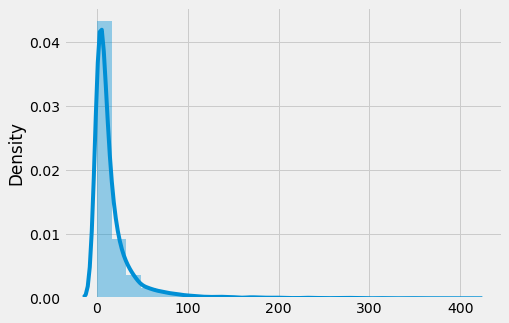

In [236]:
# Univariate Analysis
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
sns.distplot(product_distribution_training_set_df.drop(["product_id"], axis=1), bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.show()

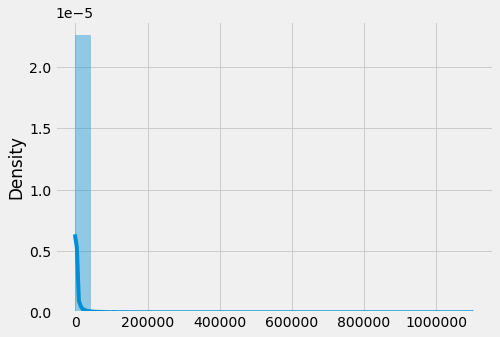

In [237]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
sns.distplot(buyer_historical_category15_money_df.drop(["buyer_id"], axis=1), bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.show()

In [238]:
print("skew value is\n",product_distribution_training_set_df.drop(["product_id"], axis=1).skew())

skew value is
 quantities 0-th day      3.574019
quantities 1-th day      4.225288
quantities 2-th day      4.597936
quantities 3-th day      3.601863
quantities 4-th day      2.942683
                           ...   
quantities 113-th day    4.086774
quantities 114-th day    1.437415
quantities 115-th day    1.787085
quantities 116-th day    2.082243
quantities 117-th day    3.084484
Length: 118, dtype: float64


In [239]:
print("skew value is\n",buyer_historical_category15_money_df.drop(["buyer_id"], axis=1).skew())

skew value is
 consumption amount in the 1st category      13.545920
consumption amount in the 2nd category      69.296227
consumption amount in the 3rd category      50.907454
consumption amount in the 4th category      39.079254
consumption amount in the 5th category      43.956477
consumption amount in the 6th category      79.692877
consumption amount in the 7th category      18.676289
consumption amount in the 8th category      26.031153
consumption amount in the 9th category      20.464383
consumption amount in the 10th category     50.120418
consumption amount in the 11th category     71.287613
consumption amount in the 12th category     89.759046
consumption amount in the 13th category    133.279452
consumption amount in the 14th category     46.712206
consumption amount in the 15th category     89.145954
dtype: float64


In [240]:
print("Kurtosis value is\n",product_distribution_training_set_df.drop(["product_id"], axis=1).kurt())

Kurtosis value is
 quantities 0-th day      14.640993
quantities 1-th day      20.054820
quantities 2-th day      26.457751
quantities 3-th day      13.674491
quantities 4-th day       8.203948
                           ...    
quantities 113-th day    25.104364
quantities 114-th day     1.463945
quantities 115-th day     4.676786
quantities 116-th day     5.427965
quantities 117-th day    12.570228
Length: 118, dtype: float64


In [241]:
print("Kurtosis value is\n",buyer_historical_category15_money_df.drop(["buyer_id"], axis=1).kurt())

Kurtosis value is
 consumption amount in the 1st category       259.706488
consumption amount in the 2nd category      5889.960485
consumption amount in the 3rd category      4127.693131
consumption amount in the 4th category      2428.389679
consumption amount in the 5th category      3448.159429
consumption amount in the 6th category      8050.159107
consumption amount in the 7th category       551.178677
consumption amount in the 8th category      1100.009286
consumption amount in the 9th category       766.474295
consumption amount in the 10th category     3232.943134
consumption amount in the 11th category     6305.881788
consumption amount in the 12th category    10586.166004
consumption amount in the 13th category    20794.519166
consumption amount in the 14th category     3259.722314
consumption amount in the 15th category     8505.571625
dtype: float64


In [242]:
#co-relation
product_distribution_training_set_df.corr()

,product_id,quantities 0-th day,quantities 1-th day,quantities 2-th day,quantities 3-th day,quantities 4-th day,quantities 5-th day,quantities 6-th day,quantities 7-th day,quantities 8-th day,...,quantities 108-th day,quantities 109-th day,quantities 110-th day,quantities 111-th day,quantities 112-th day,quantities 113-th day,quantities 114-th day,quantities 115-th day,quantities 116-th day,quantities 117-th day
product_id,1.000000,-0.342316,-0.325132,-0.319733,-0.332648,-0.368885,-0.337561,-0.367077,-0.373371,-0.360531,...,-0.458997,-0.520438,-0.436706,-0.484491,-0.472568,-0.414056,-0.506961,-0.522778,-0.512025,-0.441740
quantities 0-th day,-0.342316,1.000000,0.902315,0.936035,0.847183,0.902634,0.913089,0.828520,0.835738,0.776707,...,0.157034,0.124539,0.102131,0.119990,0.194673,0.191534,0.148565,0.317822,0.177900,0.212852
quantities 1-th day,-0.325132,0.902315,1.000000,0.920318,0.912123,0.900124,0.880855,0.848161,0.877032,0.889937,...,0.223646,0.164005,0.118094,0.056873,0.174528,0.126645,0.243690,0.260591,0.192066,0.122575
quantities 2-th day,-0.319733,0.936035,0.920318,1.000000,0.861183,0.868616,0.861127,0.773167,0.779236,0.731563,...,0.167498,0.052710,0.041018,0.045129,0.101744,0.092335,0.145506,0.260563,0.137599,0.106326
quantities 3-th day,-0.332648,0.847183,0.912123,0.861183,1.000000,0.919273,0.879862,0.842816,0.852352,0.851632,...,0.152761,0.175246,0.090365,0.039478,0.161376,0.150444,0.284285,0.293231,0.155312,0.112485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
quantities 113-th day,-0.414056,0.191534,0.126645,0.092335,0.150444,0.271670,0.357868,0.247472,0.351365,0.321782,...,0.382265,0.729945,0.550177,0.699291,0.806650,1.000000,0.562798,0.697507,0.770900,0.820413
quantities 114-th day,-0.506961,0.148565,0.243690,0.145506,0.284285,0.291614,0.284591,0.288952,0.352684,0.397246,...,0.551352,0.748657,0.586162,0.672451,0.681825,0.562798,1.000000,0.615785,0.638854,0.543277
quantities 115-th day,-0.522778,0.317822,0.260591,0.260563,0.293231,0.309694,0.360602,0.255571,0.361141,0.328650,...,0.471164,0.681086,0.600936,0.705215,0.692507,0.697507,0.615785,1.000000,0.716567,0.720538
quantities 116-th day,-0.512025,0.177900,0.192066,0.137599,0.155312,0.215785,0.279703,0.243563,0.306078,0.318598,...,0.484149,0.716661,0.638497,0.665259,0.778007,0.770900,0.638854,0.716567,1.000000,0.763844


In [243]:
buyer_historical_category15_money_df.corr()

,buyer_id,consumption amount in the 1st category,consumption amount in the 2nd category,consumption amount in the 3rd category,consumption amount in the 4th category,consumption amount in the 5th category,consumption amount in the 6th category,consumption amount in the 7th category,consumption amount in the 8th category,consumption amount in the 9th category,consumption amount in the 10th category,consumption amount in the 11th category,consumption amount in the 12th category,consumption amount in the 13th category,consumption amount in the 14th category,consumption amount in the 15th category
buyer_id,1.000000,0.012432,-0.004574,-0.003623,-0.005190,-0.000490,-0.007267,0.004354,0.010195,0.012731,0.003178,0.003495,0.007729,-0.005473,0.006432,0.000164
consumption amount in the 1st category,0.012432,1.000000,0.090636,0.112872,0.011359,0.382770,0.114240,0.628169,0.583707,0.709112,0.384113,0.114370,-0.000646,-0.002068,0.368342,0.095321
consumption amount in the 2nd category,-0.004574,0.090636,1.000000,0.658179,0.005519,0.228308,0.566239,0.381807,0.139331,0.119782,0.573062,0.776608,0.000031,0.002934,0.198068,0.847481
consumption amount in the 3rd category,-0.003623,0.112872,0.658179,1.000000,0.018327,0.363309,0.564989,0.400698,0.170217,0.186069,0.513026,0.695023,0.009064,0.007946,0.198986,0.686799
consumption amount in the 4th category,-0.005190,0.011359,0.005519,0.018327,1.000000,0.014505,0.005728,0.013893,0.009105,0.015863,0.010225,0.001994,-0.000697,0.000132,0.013616,0.001150
consumption amount in the 5th category,-0.000490,0.382770,0.228308,0.363309,0.014505,1.000000,0.721371,0.440361,0.317272,0.412581,0.318492,0.231173,0.010226,0.198730,0.259860,0.231135
consumption amount in the 6th category,-0.007267,0.114240,0.566239,0.564989,0.005728,0.721371,1.000000,0.341216,0.151346,0.165701,0.438265,0.568437,0.006791,0.114992,0.173021,0.600820
consumption amount in the 7th category,0.004354,0.628169,0.381807,0.400698,0.013893,0.440361,0.341216,1.000000,0.711953,0.704380,0.663630,0.475023,0.022079,0.027626,0.481402,0.415987
consumption amount in the 8th category,0.010195,0.583707,0.139331,0.170217,0.009105,0.317272,0.151346,0.711953,1.000000,0.723801,0.449115,0.220676,0.013238,0.019249,0.362176,0.148726
consumption amount in the 9th category,0.012731,0.709112,0.119782,0.186069,0.015863,0.412581,0.165701,0.704380,0.723801,1.000000,0.429681,0.171586,0.007590,0.006506,0.421224,0.131338


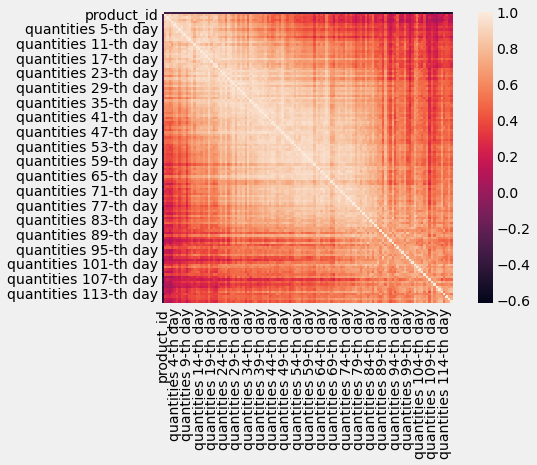

In [244]:
# matrix generation using heatmap
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(product_distribution_training_set_df.corr(), square=True)
plt.show()

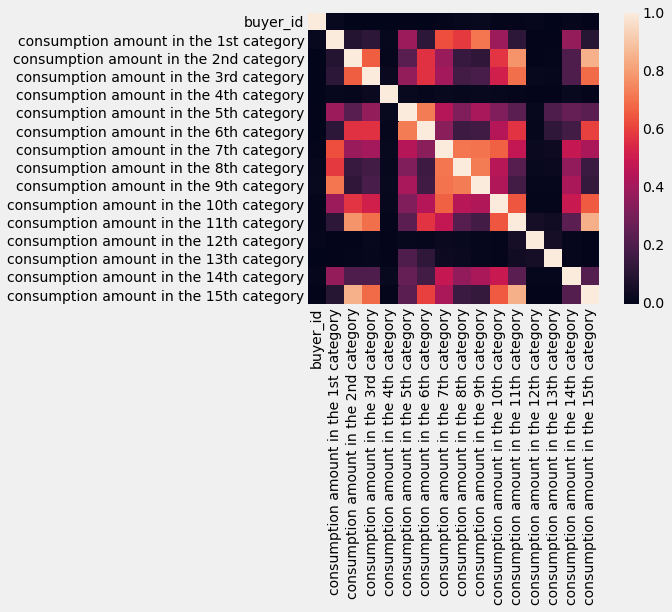

In [245]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(buyer_historical_category15_money_df.corr(), square=True)
plt.show()

In [246]:
# Final Dataframe
Final_Dataframe=pd.DataFrame(index=range(29),columns=range(100))
Key_product_IDs_df.sum(axis=0)
Total_Sales_Dataframe=Key_product_IDs_df.sum(axis=1)
Total_Sales_Dataframe.head()

0     1
1     4
2     5
3     6
4    10
dtype: int64

In [247]:
Total_Sales_Dataframe.to_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\Product_ID.txt',index=False,sep="\t")

In [248]:
#Predicting Forecast
myDataframe = Total_Sales_Dataframe.values
model = ARIMA(myDataframe, order=(2,1,0))
model_fit = model.fit()

In [249]:
# Passing steps=29 for the next 29 days prediction
Final_Dataframe = model_fit.forecast(steps=29)

In [250]:
with open('C:\\Users\\PC-2\\Desktop\\project\\data\\SalesPredictions.txt', 'a') as myfile:
        wr = csv.writer(myfile, delimiter=' ')
        wr.writerow(NewDataframe)

In [251]:
IndividualProd_Dataframe=pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\product_distribution_training_set.txt',
                                     delimiter='\t',header=None)

In [252]:
Final_Dataframe=pd.DataFrame(index=range(29),columns=range(100))
result_dataframe=pd.DataFrame()

In [253]:
len(IndividualProducts_Dataframe)

118

In [254]:
IndividualProducts_Dataframe.values

array([[ 53,   0,  57, ...,   0,   1,   0],
       [ 40,   0, 133, ...,   1,   4,   1],
       [ 37,   2,  60, ...,   2,   2,   0],
       ...,
       [ 45,  14,  12, ...,   0,   0,   1],
       [ 69,  26,  24, ...,   1,   0,   4],
       [ 89,  14,  12, ...,   1,   0,   5]], dtype=int64)

In [255]:
import csv
myVal = Dataset
model = ARIMA(IndividualProducts_Dataframe.values.reshape(-1).tolist(), order=(2,1,0))
model_fit = model.fit()
Final_Dataframe = model_fit.forecast(steps=29) 
Final_Dataframe[0][Final_Dataframe[0]<0]=0 
NewDataframe=Final_Dataframe[0].astype(int)

In [256]:
Final_Dataframe[0][Final_Dataframe[0]<0]=0 

In [257]:
df1_keyproductId=pd.read_csv("C:\\Users\\PC-2\\Desktop\\project\\data\\Product_Id.txt")
df1_keyproductId.head()

,0
0,1
1,4
2,5
3,6
4,10


In [258]:
df2_salesprediction=pd.read_csv("C:\\Users\\PC-2\\Desktop\\project\\data\\SalesPredictions.txt")
df2_salesprediction=df2_salesprediction.T

In [259]:
info = pd.read_csv('C:\\Users\\PC-2\\Desktop\\project\\data\\product_distribution_training_set.txt', sep='\t',header=None)
info.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,1,53,40,37,45,69,105,62,101,104,...,9,51,47,57,68,97,25,45,69,89
1,4,0,0,2,4,0,8,0,6,3,...,31,27,31,39,18,36,17,14,26,14
2,5,57,133,60,126,90,87,107,120,182,...,20,32,24,5,19,5,24,12,24,12
3,6,108,130,143,92,88,101,66,75,89,...,17,0,0,10,5,0,5,16,13,12
4,10,0,0,2,0,4,0,36,3,37,...,14,26,45,22,13,7,28,13,34,9


In [260]:
data_transposed1 = info.T

In [261]:
product_id=data_transposed1.iloc[0]
data_transposed=data_transposed1.drop(data_transposed1.index[0])
print(data_transposed)

     0   1    2    3   4   5   6   7   8   9   ...  90  91  92  93  94  95  \
1    53   0   57  108   0  17   2  38  43  62  ...   0   1   2   2   0   0   
2    40   0  133  130   0  22  31  54  40  70  ...   1   1   0   5   0   0   
3    37   2   60  143   2  16  13  38  52  75  ...   3   3   2   7   0   0   
4    45   4  126   92   0  15   4  45  55  68  ...   0   1   2   0   0   0   
5    69   0   90   88   4  45  18  50  72  41  ...   0   4   6   0   0   0   
..   ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
114  97  36    5    0   7  16  32  19   1   0  ...   2   6   0   0   1   5   
115  25  17   24    5  28  14  13  24   9   0  ...   0   3   3   0   3   2   
116  45  14   12   16  13  12   7  18   3  14  ...   0   2   1   1   6   0   
117  69  26   24   13  34  20  40  24   7  18  ...   4   2   2   1   3   7   
118  89  14   12   12   9  18  18  25   5   0  ...   1   6   2   1   4   4   

     96  97  98  99  
1     0   0   1   0  
2     0   1   4   1

In [262]:
training=data_transposed[0:100]
testing=data_transposed[100:118]
product = data_transposed.iloc[0:118,99].copy()

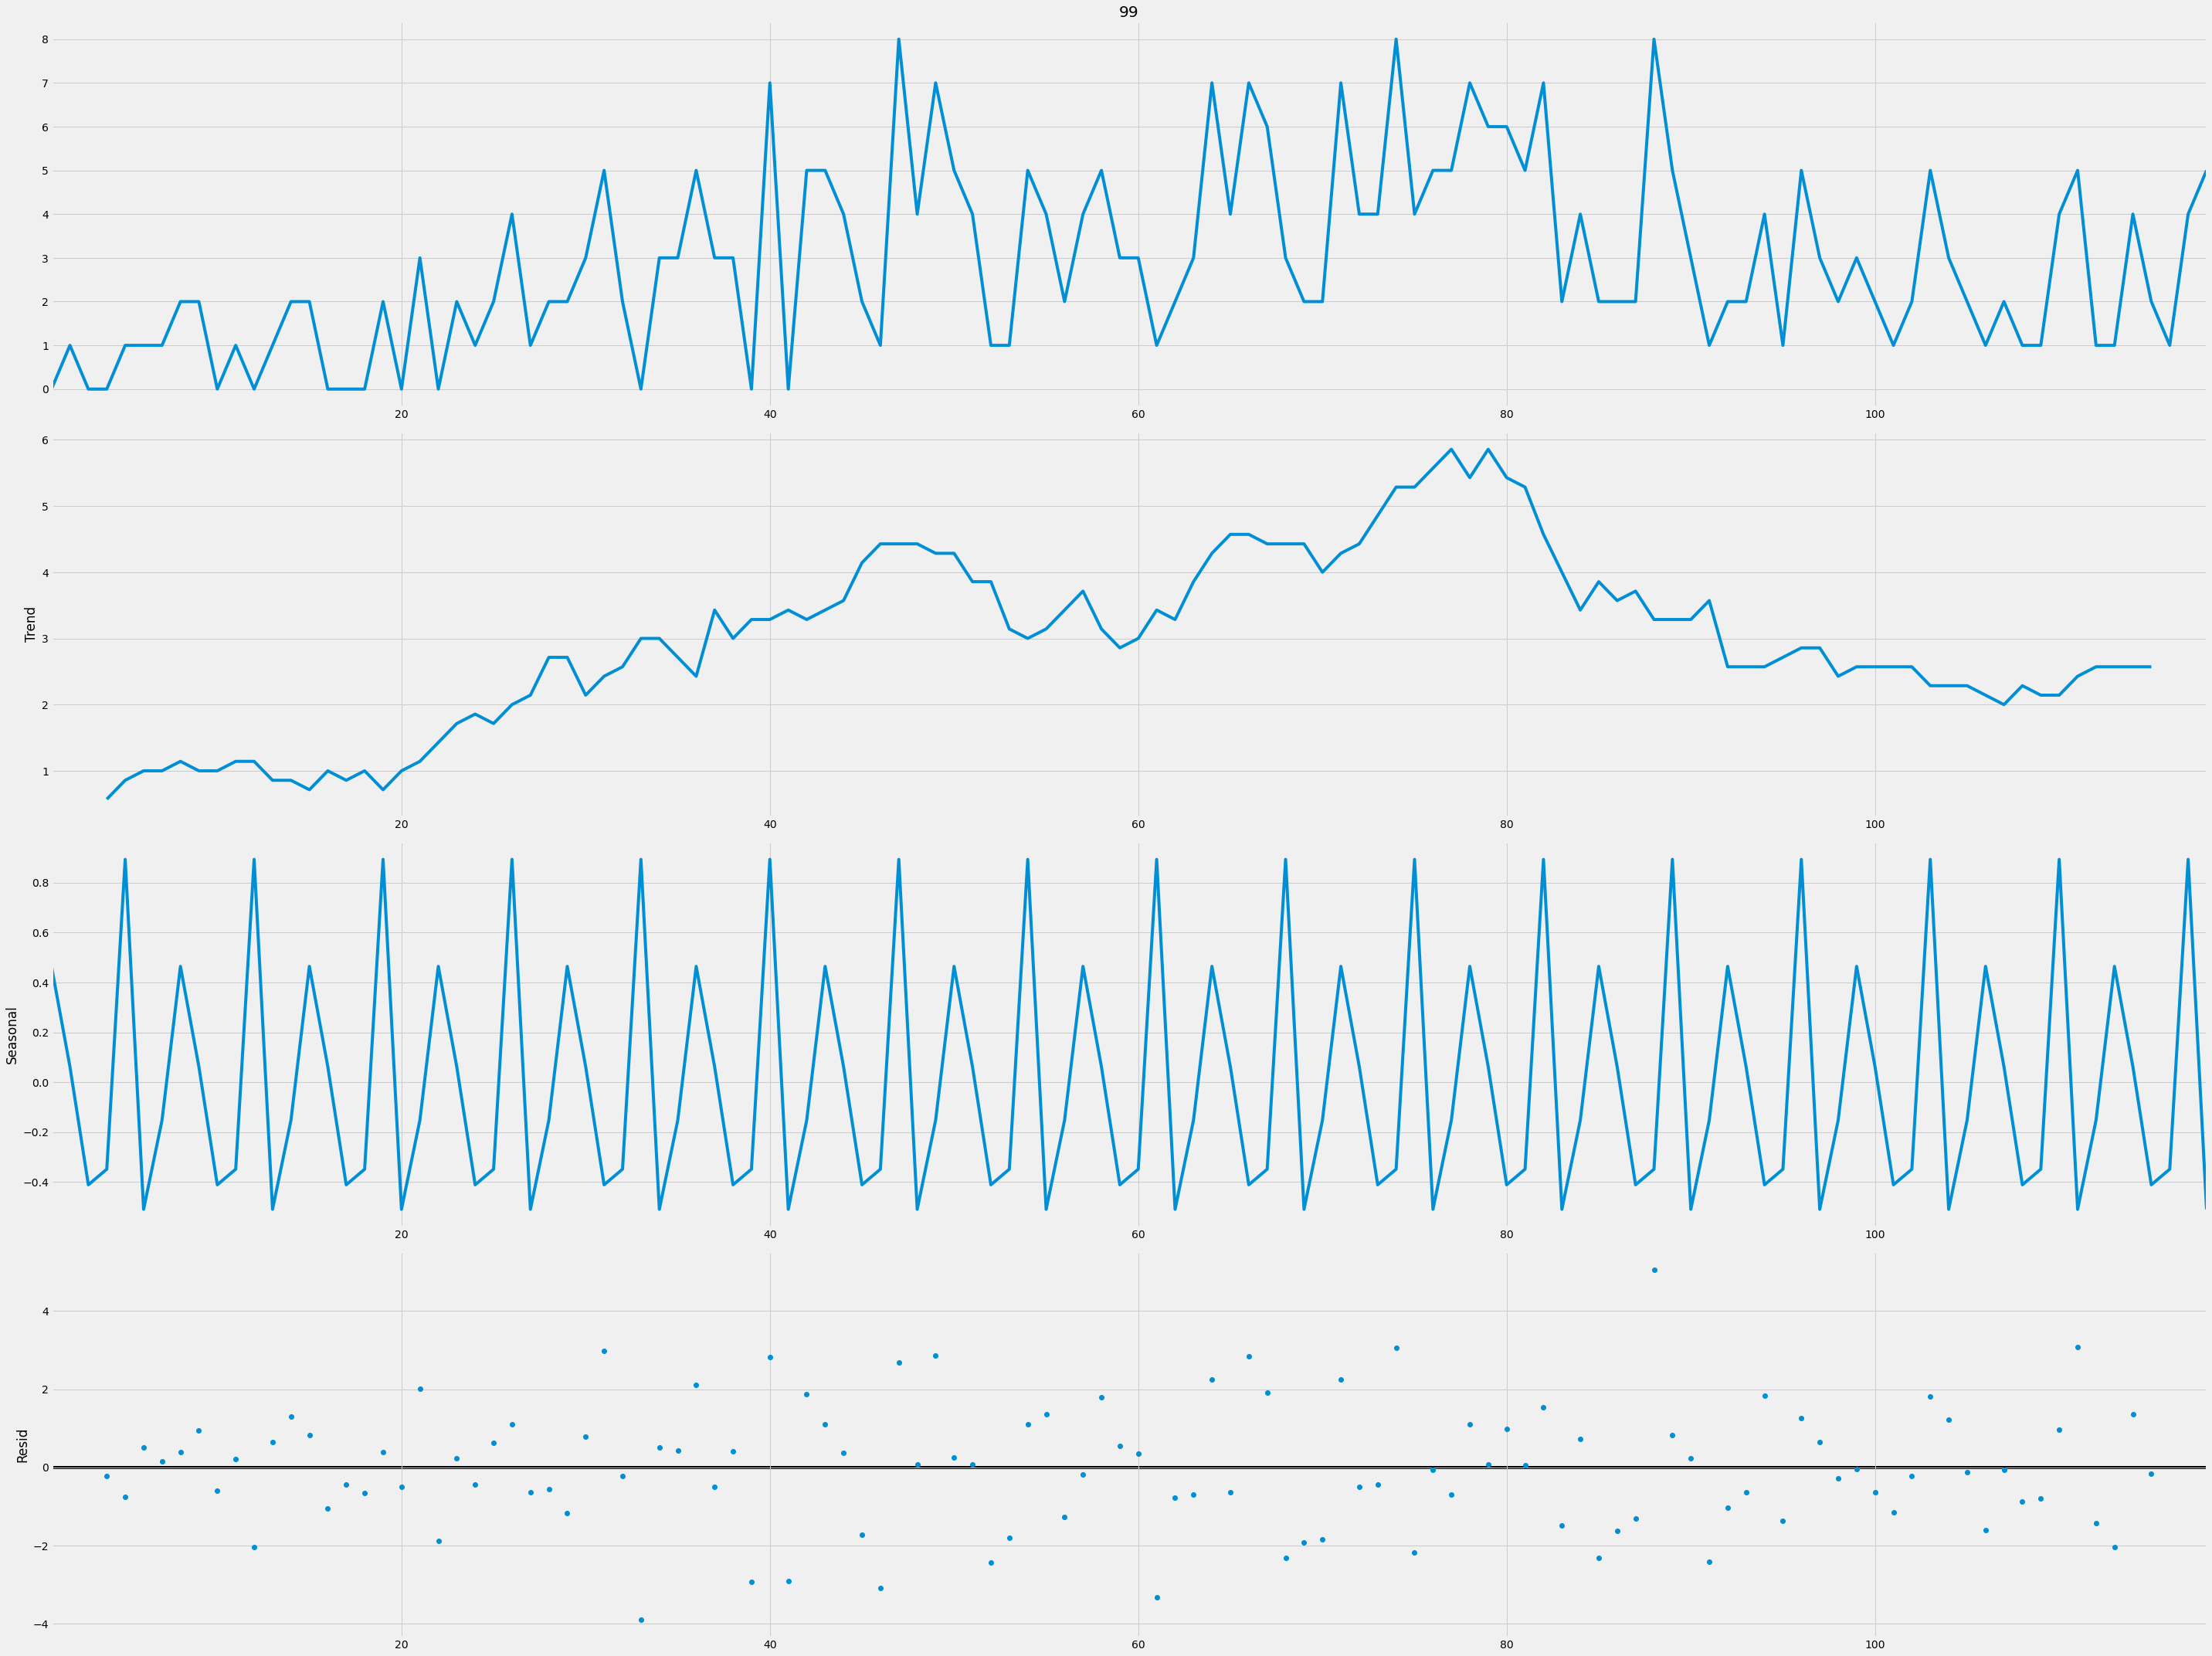

In [263]:
resulta = seasonal_decompose(product, model='additive',freq=7)
resulta.plot()
pyplot.show()

In [264]:
train_sum1= training.sum(axis=1).astype(float)
train_sum=train_sum1
trainarray1=np.array(train_sum)
trainarray=trainarray1
series_test1=pd.Series(trainarray)
series_test=series_test1
series_test.index=pd.to_datetime(series_test.index,unit='D')

test_sum1= testing.sum(axis=1).astype(float)
test_sum=test_sum1
testarray1=np.array(test_sum)
testarray=testarray1
series_testing1=pd.Series(testarray)
series_testing=series_testing1
series_testing.index=pd.to_datetime(series_testing.index,unit='D')

total1= data_transposed.sum(axis=1).astype(float)
total=total1
totalarray1=np.array(total)
totalarray=totalarray1
series1=pd.Series(totalarray)
series=series1
series.index=pd.to_datetime(series.index,unit='D')

In [265]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [266]:
minval=0
paramval=''
seasonalparam=''
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(series, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        if minval==0:
            minval=results.aic
            paramval=param
            seasonalparam=param_seasonal
        if results.aic<minval:
            minval=results.aic
            paramval=param
            seasonalparam=param_seasonal
print(minval,paramval,seasonalparam)

1393.6455544917806 (1, 1, 1) (0, 1, 1, 7)


In [267]:
mod = sm.tsa.statespace.SARIMAX(series_test,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
train_results = mod.fit(disp=0)
train_predict=train_results.forecast(steps=18)
train_predict1=np.array(train_predict)

In [268]:
mod = sm.tsa.statespa ce.SARIMAX(series,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit(disp=-1)
predict=results.forecast(steps=29)
series_total=np.array(predict)

In [269]:
res='0\t' 
fileobj = open("C:\\Users\\PC-2\\Desktop\\project\\data\\output.txt", mode='w+')
for i in series_total:
    res+=str(int(i))+ '\t'
fileobj.write(res)
fileobj.write('\n')

1

In [270]:
count=0
for col in data_transposed:
    data_transposedarray=np.array(data_transposed[col]).astype(float)
    seriesdata_transposed=pd.Series(data_transposedarray)
    seriesdata_transposed.index=pd.to_datetime(seriesdata_transposed.index,unit='D')
    mini=0
    product_paramvalB=''
    product_seasonalparamB=''
    for product_paramB in pdq:
        for product_param_seasonalB in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(seriesdata_transposed,
                                                order=product_paramB,
                                                seasonal_order=product_param_seasonalB,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

            product_resultsB = mod.fit()
            if mini==0:
                mini=product_resultsB.aic
                product_paramvalB=product_paramB
                product_seasonalparamB=product_param_seasonalB
            if product_resultsB.aic<mini:
                mini=product_resultsB.aic
                product_paramvalB=product_paramB
                product_seasonalparamB=product_param_seasonalB
    data_transposedrowarima = sm.tsa.statespace.SARIMAX(seriesdata_transposed,
                                                        order=product_paramvalB,
                                                        seasonal_order=product_param_seasonalB,
                                                        enforce_stationarity=False,
                                                        enforce_invertibility=False)

    data_transposedarima = data_transposedrowarima.fit()
    data_transposedpredictarima=data_transposedarima.forecast(steps=29)
    data_transposedfinal=np.array(data_transposedpredictarima)
    res=str(product_id[count])+'\t'
    count+=1
    for i in data_transposedfinal:
        if i<0:
            i=0
        res+=str(int(round(i)))+ '\t'
    fileobj.write(res )
    fileobj.write('\n')
fileobj.close()

In [271]:
product_train=product[0:105]
product_test=product[105:118]
product_array=np.array(product)
product_arrayproduct_array=pd.Series(product_array)
product_arrayproduct_array.index=pd.to_datetime(product_arrayproduct_array.index,unit='D')

product_testarray=np.array(product_test)
series_product_test=pd.Series(product_testarray)
series_product_test.index=pd.to_datetime(series_product_test.index,unit='D')

product_trainarray=np.array(product_train)
series_product_train=pd.Series(product_trainarray)
series_product_train.index=pd.to_datetime(series_product_train.index,unit='D')

modseries_product_train = sm.tsa.statespace.SARIMAX(series_product_train,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)

series_product_traintrain_results = modseries_product_train.fit(disp=0)

series_product_traintrain_results_predict=series_product_traintrain_results.forecast(steps=13)

rms = sqrt(mean_squared_error(series_product_test, series_product_traintrain_results_predict))

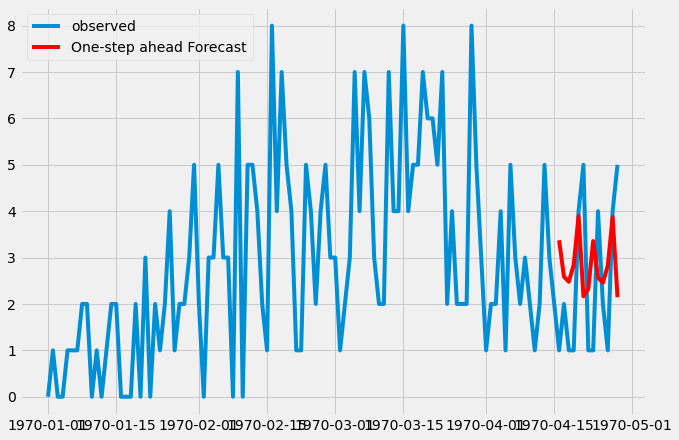

In [272]:
plt.figure(figsize=(10, 7))
plt.plot(product_arrayproduct_array,label='observed')
plt.plot(series_product_traintrain_results_predict, color='red',label='One-step ahead Forecast' )
plt.legend()
plt.show()

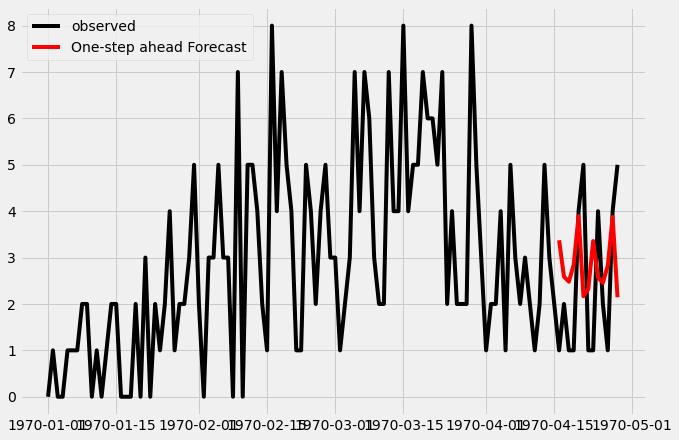

In [273]:
plt.figure(figsize=(10, 7))
plt.plot(product_arrayproduct_array,color='black',label='observed')
plt.plot(series_product_traintrain_results_predict, color='red',label='One-step ahead Forecast' )
plt.legend()
plt.show()